## Chantal Levi, Ezequiel Mautner

## Ejercicio 1

Escribir el sistema de ecuaciones anterior en forma matricial como $Ax = b$, definiendo cuál es la matriz $A$, cuáles son los vectores $x$ y $b$, y las dimensiones de cada uno.

El sistema de ecuaciones se puede expresar como:

$$
Ax = b
$$

Donde:
- $A$ es la matriz de coeficientes
- $x$ es el vector de coeficientes del polinomio buscado
- $b$ es el vector de valores $f(x)$
- Donde $f(x)$ = $|\frac{1}{1+25x^{2}}|$
- $n$ ∈ ℕ

$$ 
\begin{bmatrix}
    x_0^{n} & x_0^{n-1} & \cdots & x_0^{n-n} \\
    x_1^{n} & x_1^{n-1} & \cdots & x_1^{n-n} \\
    x_2^{n} & x_2^{n-1} & \cdots & x_2^{n-n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_n^{n} & x_n^{n-1} & \cdots & x_n^{n-n}
\end{bmatrix}

\begin{bmatrix}
    a_n \\
    a_{n-1} \\
    \vdots \\
    a_{n-n}
\end{bmatrix} = 

\begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    \vdots \\
    f(x_n)
\end{bmatrix}
$$
    

## Ejercicio 2.
 Construir un `np.ndarray` que contenga 8 nodos equiespaciados entre -1 y 1 y resolver el sistema lineal del ejercicio 1, obteniendo así los coeficientes del polinomio buscado. Implementar una función que reciba un parámetro $x$ de tipo float y devuelva $p(x)$, el valor del polinomio en ese punto.

In [19]:
import numpy as np
def f(x:float) -> float:
    return 1/(1 + 25*(x**2))

def p(x:float) -> float:
    return np.dot(np.vander([x],len(x_solucion)), (x_solucion))[0]

nodos = np.linspace(-1,1,8)
A =  np.vander(nodos)
b = np.array([f(x) for x in nodos])
x_solucion = np.linalg.solve(A,b)

## Ejercicio 3

En una misma figura, graficar dentro del intervalo $I$:

- El gráfico de la función $f$.
- El gráfico del polinomio $p$ hallado.

Los valores de $f$ en cada uno de los nodos usados para interpolar, visualizados como puntos.
¿Cómo es la aproximación de $p$ a $f$ en cada uno de los nodos? ¿Y fuera de los nodos?

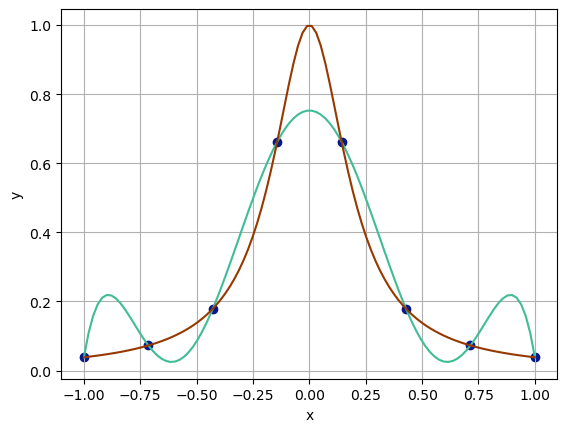

In [20]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

space = np.linspace(-1, 1, 100)
plt.figure(0)

vr = [p(i.item()) for i in space]
plt.plot(space, vr, color='#40BC96')  # Cambiar el color de la línea a azul

y = 1 / (1 + 25 * (space**2))
plt.plot(space, y, color='#973801')  # Cambiar el color de la línea a rojo

vr = [p(x) for x in nodos]
plt.scatter(nodos, vr, c='#03178C')  # Cambiar el color de los puntos a verde

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

En cada uno de los nodos la aproximación de $p(x)$ a $f(x)$ es exacta, es decir,  $p(x)$ = $f(x)$ ; graficamente, se cortan. Fuera de lo nodos,   $p(x)$ se acerca a $f(x)$, $p(x)$ $≈$ $f(x)$. Graficamente no son lo mismo, tienen forma parecida (no respeta algunos puntos de inflexion); con esto a veces crece cuando debería decrecer. 



## Ejercicio 4

En este ejercicio, vamos a implementar una función para cuantificar la aproximación de $p$ a $f$ utilizando la siguiente fórmula de distancia o error:
       
$$   
error(x) = |f(x) - p(x)|
$$

Luego, utilizaremos esta función para evaluar el error de aproximación de $p$ a $f$ de la siguiente manera:
1. Construir un nuevo vector con 100 puntos equiespaciados dentro del intervalo $I$ (no confundir estos con los nodos en los que interpolamos antes).
2. Evaluar la función de error en cada uno de los puntos y reportar el promedio y el máximo de estos 100 errores calculados.

In [21]:
error_space = np.linspace(-1,1,100)
error = [abs(f(x.item())-p(x.item())) for x in error_space]
Max_error = np.max(error)
Mean_error = np.mean(error)

print('Error maximo:',Max_error,'\nError promedio:',Mean_error)

Error maximo: 0.24528527039305015 
Error promedio: 0.08459142237385305


## Ejercicio 5

En este ejercicio, recrearemos la figura del ejercicio 3, pero esta vez graficaremos tanto a $f$ como a $p$ a lo largo del intervalo extendido $[−1.2, 1.2]$. Observaremos cómo es la aproximación por fuera del intervalo original $I$, que es $[−1, 1]$.

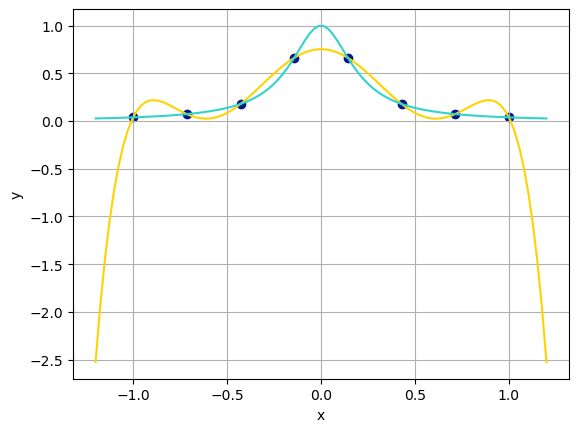

In [22]:
space  = np.linspace(-1.2,1.2,100)
plt.figure(0)

vr = [p(i.item()) for i in space]
plt.plot(space,vr, color='#FFD300')
y = 1/(1 + 25*(space**2))
plt.plot(space, y, color='#33D3CC')
vr = [p(x) for x in nodos]
plt.scatter(nodos, vr, c = '#03178C')
plt.xlabel( "x")
plt.ylabel( "y")
plt.grid(True)

Podemos ver gracias al gráfico que por fuera del intervalo $[-1,1]$, la aproximación es pésima. $f(x)$ tiende a 0 por derecha e izquierda mientras que $p(x)$ tiende a $-\infty$ . Esto puede deberse a que no usamos valores fuera del intervalo para generar $p(x)$. 

## Ejercicio 6

Repetir los ejercicios 2, 3 y 4 esta vez tomando 16 nodos. ¿Cómo cambia el comportamiento de $p$ y su aproximación a $f$? El error de aproximación medido en el ejercicio 4, ¿mejoró o empeoró?


## 6.2) 

In [23]:
nodos = np.linspace(-1,1,16)
A =  np.vander(nodos)
b = np.array([f(x) for x in nodos])
x_solucion = np.linalg.solve(A,b)

## 6.3)

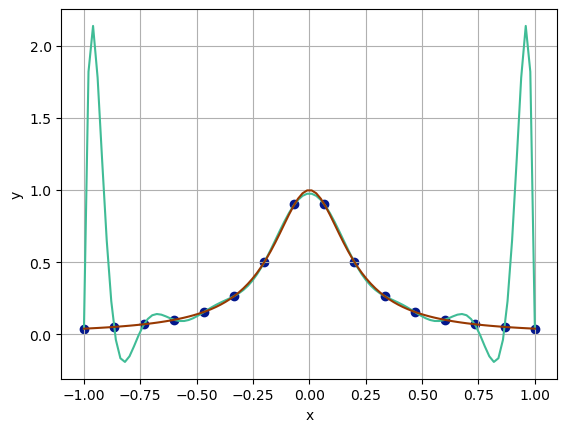

In [24]:
space  = np.linspace(-1,1,100)
plt.figure(1)
vr = [p(i.item()) for i in space]
plt.plot(space,vr, color= '#40BC96')
y = 1/(1 + 25*(space**2))
plt.plot(space, y, color = '#973801')
vr = [p(x) for x in nodos]
plt.scatter(nodos, vr, c = '#03178C')
plt.xlabel( "x")
plt.ylabel( "y")
plt.grid(True)

Gracias al gráfico, podemos ver que la aproximación a excepción de los extremos mejora. A partir de $[-0.5, 0.5]$ esta es casi igual a la $f(x)$. 

## 6.4)

In [27]:
error_space = np.linspace(-1,1,100)
error = [abs(f(x.item())-p(x.item())) for x in error_space]
Max_error = np.max(error)
Mean_error = np.mean(error)

print('Error maximo:',Max_error,'\nError promedio:',Mean_error)

Error maximo: 2.096722908990459 
Error promedio: 0.18306390057506292


Anteriormente obtuvimos como resultados : $≈$ 0.245 como error máximo y $≈$ 0.0846 como error promedio. Con esta nueva aproximación obtenemos 
$≈$ 2.097 como error máximo y $≈$  0.183 como error promedio. Es evidente que ambos errores aumentan. Sin embargo, concluimos que la aproximación mejoró.

## Ejercicio 7

Puede demostrarse que la interpolación es óptima si la distribución de los nodos en un dado intervalo se corresponde con las raíces de una familia de polinomios conocidos como Polinomios de Chebyshev. A continuación queremos verificar que el error cometido en la interpolación se minimiza utilizando estos nodos.

*(Opcional)* Investigar cómo se calculan los nodos de Chebyshev e implementar una función en Python que reciba como parámetro de entrada la cantidad de nodos que se quiere generar y devuelva los nodos correspondientes.

Repetir el ejercicio 6, utilizando ocho nodos de Chebyshev y comparar los errores obtenidos con el caso de ocho nodos equiespaciados.

Nodos de Chebyshev:
- 0.9807852804032304
- 0.8314696123025452
- 0.5555702330196023
- 0.19509032201612833
- -0.1950903220161282
- -0.555570233019602
- -0.8314696123025453
- -0.9807852804032304


## 7.2) 

In [10]:
nodos = [0.9807852804032304 , 0.8314696123025452 , 0.5555702330196023 ,0.19509032201612833 , -0.1950903220161282 , -0.555570233019602 ,-0.8314696123025453 , -0.9807852804032304]
A =  np.vander(nodos)
b = np.array([f(x) for x in nodos])
x_solucion = np.linalg.solve(A,b)

## 7.3) 

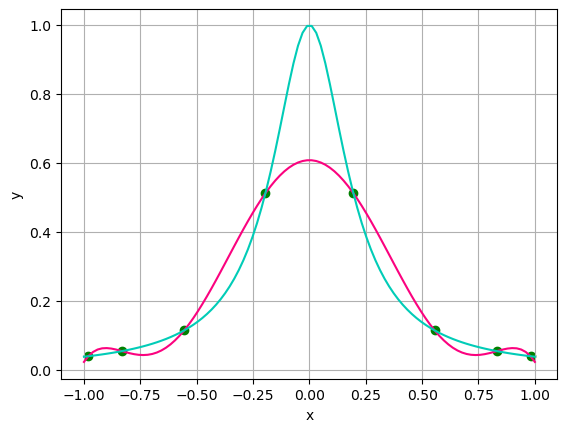

In [11]:
space  = np.linspace(-1,1,100)
plt.figure(2)
vr = [p(i.item()) for i in space]
plt.plot(space,vr, color = '#FB027F')
y = 1/(1 + 25*(space**2))
plt.plot(space, y, color = '#01CCB7')
vr = [p(x) for x in nodos]
plt.scatter(nodos, vr, c = 'green')
plt.xlabel( "x")
plt.ylabel( "y")
plt.grid(True)

## 7.4)

In [15]:
error_space = np.linspace(-1,1,100)
error = [abs(f(x.item())-p(x.item())) for x in error_space]
Max_error = np.max(error)
Mean_error = np.mean(error)
print('Error maximo:',Max_error,'\nError promedio:',Mean_error)

Error maximo: 0.3894684748855268 
Error promedio: 0.07003444598051783


Anteriormente obtuvimos como resultados : $≈$ 0.245 como error máximo y $≈$ 0.0846 como error promedio. Con esta nueva aproximación obtenemos 
$≈$ 0.389 como error máximo y $≈$ 0.070 como error promedio. Podemos ver que en los extremos en comparación al gráfico del ejercicio 3 y difiere más en el centro con $p(x)$. Es evidente que el error máximo aumentó y el error promedio disminuyó. Concluimos que la aproximación mejora.  

## *Opcional*

In [13]:
import math
a = -1
b = 1
def nodos_cheby(n):
    return [(.5*(a+b)+.5*(b-a)*math.cos((math.pi*((2*k)-1))/(2*n))) for k in range(1, n+1)]
    
print(sorted(nodos_cheby(8)))

[-0.9807852804032304, -0.8314696123025453, -0.555570233019602, -0.1950903220161282, 0.19509032201612833, 0.5555702330196023, 0.8314696123025452, 0.9807852804032304]
